# 패션 MNIST 데이터셋을 이용

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [2]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Duplicate key in file '/Users/yonghyunpark/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')


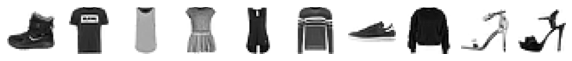

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [4]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [5]:
## 각 레이블 당 샘플 개수
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


### 로지스틱 회귀로 패션 아이템 분류
- SGDClassifier 이용
- 각 샘플을 1차원 배열로 만들어야한다.

In [6]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [7]:
print(train_scaled.shape)

(60000, 784)


In [8]:
# SGDClassifier 클래스와 cross_validate함수를 이용하여 교차검증으로 성능확인
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8192833333333333


### 인공신경망

- Tensorflow & Keras

In [9]:
import tensorflow as tf
from tensorflow import keras

### 인공 신경망으로 모델만들기

- 인공 신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 별도로 덜어내어 사용

Why?

1. 데이터셋은 충분히 크기 때문에 검증 점수가 안정적
2. 훈련시간이 오래걸린다.

In [10]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42
)

In [11]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


- 먼저 train세트로 모델을 만들고 다음, val셋으로 훈련한 모델을 평가

In [12]:
## 10개의 패션아이템분류, 출력되는 값 확률로 바꾸기==softmax
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [13]:
## Sequential 클래스 객체를 만들 때 밀집층의 객체 dense를 전달
model = keras.Sequential(dense)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### 인공 신경망으로 패션 아이템 분류

In [14]:
## 이진분류 : loss='binary_crossentropy'
## 다중분류 : loss='categorical_crossentropy'
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- 다중분류에서 cross entropy 손실 함수를 사용하려면 정수타깃값을 원-핫 인코딩으로 변환해야한다.

In [15]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


- Tensorflow에서는 원핫인코딩으로 바꾸지않고도 그냥 사용가능 (sparse_categorical_crossentropy)
- 타깃값을 원-핫 인코딩으로 준비했으면 loss = 'categorical_crossentropy' 로 지정

In [16]:
model.fit(train_scaled, train_target, epochs=5)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 62us/sample - loss: 0.6074 - acc: 0.7941
Epoch 2/5
48000/48000 [==============================] - 3s 57us/sample - loss: 0.4779 - acc: 0.8403
Epoch 3/5
48000/48000 [==============================] - 3s 58us/sample - loss: 0.4550 - acc: 0.8488
Epoch 4/5
48000/48000 [==============================] - 3s 64us/sample - loss: 0.4440 - acc: 0.8511
Epoch 5/5
48000/48000 [==============================] - 3s 60us/sample - loss: 0.4358 - acc: 0.8549


- 이제 검증셋(val_scaled, val_target) 에서 모델의 성능을 확인
- evaluate()

In [17]:
model.fit(val_scaled, val_target)

Train on 12000 samples
12000/12000 [==============================] - 1s 62us/sample - loss: 0.4526 - acc: 0.8462


In [18]:
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 0s 41us/sample - loss: 0.4339 - acc: 0.8553


[0.43390325395266216, 0.8553333]

# 심층 신경망

### 2개의 층

In [19]:
from tensorflow import keras
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [20]:
from sklearn.model_selection import train_test_split
train_scaled = train_input/255
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target,val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

활성화 함수를 사용한 은닉층과 소프트맥스 함수를 사용한 출력층을 Dense 클래스로

In [21]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax') ## 10개의 클래스를 분류하므로 10개의 뉴런

### 심층신경망 만들기

In [22]:
model = keras.Sequential([dense1, dense2])

In [23]:
model.summary() #정보를 얻을 수 있음

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


- (None, 100) == (batch_size, 은닉층 뉴런개수)
- Parameters 78500 == 784*100+100 == 픽셀값 * 뉴런개수 + 절편

### 층을 추가하는 다른 방법

In [24]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='fashion MNIST Model')

In [25]:
model.summary()

Model: "fashion MNIST Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [26]:
## 층 추가하는 방법
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


**모델훈련**

In [28]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 127us/sample - loss: 0.5646 - acc: 0.8067
Epoch 2/5
48000/48000 [==============================] - 6s 131us/sample - loss: 0.4088 - acc: 0.8525
Epoch 3/5
48000/48000 [==============================] - 6s 134us/sample - loss: 0.3748 - acc: 0.8650
Epoch 4/5
48000/48000 [==============================] - 6s 134us/sample - loss: 0.3526 - acc: 0.8719
Epoch 5/5
48000/48000 [==============================] - 6s 134us/sample - loss: 0.3365 - acc: 0.8781


In [29]:
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 1s 51us/sample - loss: 0.3574 - acc: 0.8717


[0.35739457327127455, 0.87166667]

In [30]:
print(history.history)

{'loss': [0.5645793204903603, 0.40875049680968123, 0.3748432002961636, 0.35264510194957255, 0.33647137076656025], 'acc': [0.80672914, 0.8525417, 0.865, 0.87191665, 0.87808335]}


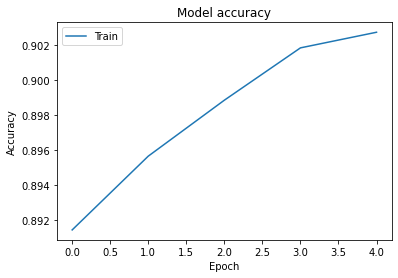

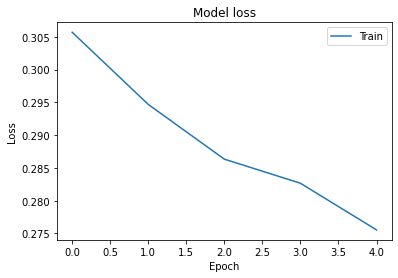

In [54]:
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### 렐루 함수

In [32]:
## MNIST 데이터는 28*28 크기라서 신경망에 주입하기 위해 reshape()메소드를 사용해 1차원으로 펼침
## keras.layers.Flatten으로 펼친다.
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [34]:
## 모델 훈련
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [35]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(train_scaled, train_target, epochs = 5)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 133us/sample - loss: 0.5299 - acc: 0.8134
Epoch 2/5
48000/48000 [==============================] - 7s 143us/sample - loss: 0.3937 - acc: 0.8589
Epoch 3/5
48000/48000 [==============================] - 7s 137us/sample - loss: 0.3547 - acc: 0.8725
Epoch 4/5
48000/48000 [==============================] - 7s 142us/sample - loss: 0.3328 - acc: 0.8815
Epoch 5/5
48000/48000 [==============================] - 6s 133us/sample - loss: 0.3199 - acc: 0.8864


In [36]:
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 1s 53us/sample - loss: 0.3707 - acc: 0.8754


[0.3706860802968343, 0.8754167]

### Adam 을 이용하여 MNIST 모델 훈련

In [37]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(train_scaled, train_target, epochs=5)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 82us/sample - loss: 0.5209 - acc: 0.8185
Epoch 2/5
48000/48000 [==============================] - 4s 78us/sample - loss: 0.3899 - acc: 0.8611
Epoch 3/5
48000/48000 [==============================] - 4s 83us/sample - loss: 0.3506 - acc: 0.8731
Epoch 4/5
48000/48000 [==============================] - 4s 76us/sample - loss: 0.3245 - acc: 0.8819
Epoch 5/5
48000/48000 [==============================] - 4s 77us/sample - loss: 0.3053 - acc: 0.8881


In [39]:
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 1s 54us/sample - loss: 0.3436 - acc: 0.8751


[0.3435664714773496, 0.8750833]

# 신경망 모델 훈련

### 손실곡선
- <tensorflow.python.keras.callbacks.History at 0x7fc53684fcc0>
- 위의 메시지는 fit() 메소드의 실행 결과를 출력한 것.
    - History 객체에는 훈련과정에서 계산한 손실, 정확도 값이 저장되어 있다.

In [62]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled=train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [63]:
def model_fn(a_layer=None):
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [64]:
model = model_fn()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0) ## verbose=2 진행막대빼고출력, verbose=0 훈련과정나타내지않음

In [66]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


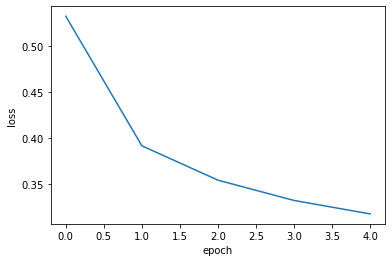

In [67]:
# 손실값 출력
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

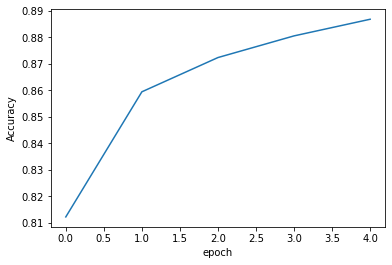

In [68]:
# 정확도 출력
plt.plot(history.history['acc'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

Train on 48000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 128us/sample - loss: 0.5327 - acc: 0.8108
Epoch 2/20
48000/48000 [==============================] - 6s 120us/sample - loss: 0.3946 - acc: 0.8579
Epoch 3/20
48000/48000 [==============================] - 6s 124us/sample - loss: 0.3570 - acc: 0.8701
Epoch 4/20
48000/48000 [==============================] - 6s 128us/sample - loss: 0.3346 - acc: 0.8796
Epoch 5/20
48000/48000 [==============================] - 6s 129us/sample - loss: 0.3182 - acc: 0.8847
Epoch 6/20
48000/48000 [==============================] - 6s 133us/sample - loss: 0.3081 - acc: 0.8900
Epoch 7/20
48000/48000 [==============================] - 7s 136us/sample - loss: 0.2984 - acc: 0.8939
Epoch 8/20
48000/48000 [==============================] - 7s 143us/sample - loss: 0.2895 - acc: 0.8974
Epoch 9/20
48000/48000 [==============================] - 7s 140us/sample - loss: 0.2834 - acc: 0.9004
Epoch 10/20
48000/48000 [=========================

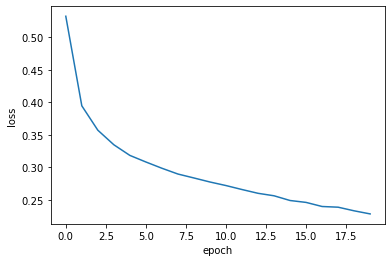

In [70]:
# epochs=20 으로 늘려서 훈련하고 손실그래프 출력
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(train_scaled, train_target, epochs=20)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 검증손실
- 모델이 잘 훈련되었는지 판단하려면 정확도보다는 loss값을 확인하는 것이 낫다
- validation_data : epoch마다 검증손실을 계산하기 위해 fit()에 검증데이터를 전달가능

In [72]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))
print(history.history.keys())

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 7s 149us/sample - loss: 0.5322 - acc: 0.8123 - val_loss: 0.4180 - val_acc: 0.8513
Epoch 2/20
48000/48000 [==============================] - 7s 140us/sample - loss: 0.3942 - acc: 0.8595 - val_loss: 0.3787 - val_acc: 0.8657
Epoch 3/20
48000/48000 [==============================] - 7s 145us/sample - loss: 0.3575 - acc: 0.8709 - val_loss: 0.4004 - val_acc: 0.8586
Epoch 4/20
48000/48000 [==============================] - 7s 150us/sample - loss: 0.3358 - acc: 0.8794 - val_loss: 0.3485 - val_acc: 0.8783
Epoch 5/20
48000/48000 [==============================] - 7s 155us/sample - loss: 0.3217 - acc: 0.8859 - val_loss: 0.3533 - val_acc: 0.8794
Epoch 6/20
48000/48000 [==============================] - 8s 158us/sample - loss: 0.3101 - acc: 0.8903 - val_loss: 0.4030 - val_acc: 0.8638
Epoch 7/20
48000/48000 [==============================] - 8s 160us/sample - loss: 0.2999 - acc: 0.8939 - val_l

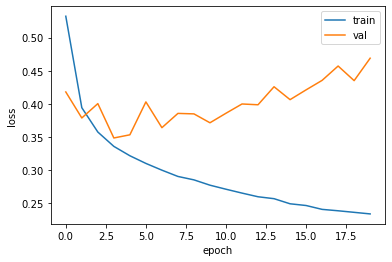

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 96us/sample - loss: 0.5286 - acc: 0.8155 - val_loss: 0.4306 - val_acc: 0.8489
Epoch 2/20
48000/48000 [==============================] - 4s 86us/sample - loss: 0.3955 - acc: 0.8582 - val_loss: 0.3788 - val_acc: 0.8638
Epoch 3/20
48000/48000 [==============================] - 4s 88us/sample - loss: 0.3557 - acc: 0.8702 - val_loss: 0.3585 - val_acc: 0.8721
Epoch 4/20
48000/48000 [==============================] - 4s 92us/sample - loss: 0.3300 - acc: 0.8780 - val_loss: 0.3592 - val_acc: 0.8717
Epoch 5/20
48000/48000 [==============================] - 5s 96us/sample - loss: 0.3107 - acc: 0.8861 - val_loss: 0.3456 - val_acc: 0.8767
Epoch 6/20
48000/48000 [==============================] - 5s 96us/sample - loss: 0.2942 - acc: 0.8915 - val_loss: 0.3407 - val_acc: 0.8767
Epoch 7/20
48000/48000 [==============================] - 5s 97us/sample - loss: 0.2828 - acc: 0.8944 - val_loss: 0.

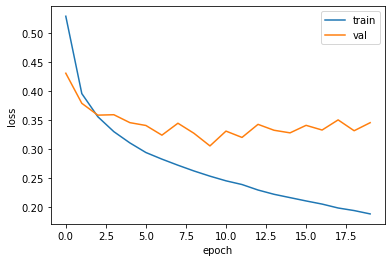

In [77]:
## Adam optimizer 적용
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(train_scaled, train_target, epochs=20, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

- 과대적합이 감소한 것을 볼 수 있다.
- lr을 조정해서 더 나은 손실 곡선을 얻을 수 있다.

### Drop Out
- 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막는다.
- keras.layers.Dropout()

In [78]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


- DropOut층은 훈련되는 모델 파라미터가 없다.
- 입력과 출력의 크기가 같다.
- 일부 뉴런의 출력을 0으로 만들지만, 전체 출력 배열의 크기를 바꾸지는 않는다.


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 124us/sample - loss: 0.6020 - acc: 0.7875 - val_loss: 0.4283 - val_acc: 0.8478
Epoch 2/20
48000/48000 [==============================] - 5s 108us/sample - loss: 0.4373 - acc: 0.8420 - val_loss: 0.4108 - val_acc: 0.8542
Epoch 3/20
48000/48000 [==============================] - 6s 116us/sample - loss: 0.4049 - acc: 0.8535 - val_loss: 0.3643 - val_acc: 0.8673
Epoch 4/20
48000/48000 [==============================] - 6s 115us/sample - loss: 0.3819 - acc: 0.8599 - val_loss: 0.3529 - val_acc: 0.8715
Epoch 5/20
48000/48000 [==============================] - 6s 115us/sample - loss: 0.3654 - acc: 0.8671 - val_loss: 0.3471 - val_acc: 0.8733
Epoch 6/20
48000/48000 [==============================] - 6s 115us/sample - loss: 0.3524 - acc: 0.8698 - val_loss: 0.3533 - val_acc: 0.8717
Epoch 7/20
48000/48000 [==============================] - 6s 124us/sample - loss: 0.3436 - acc: 0.8738 - val_l

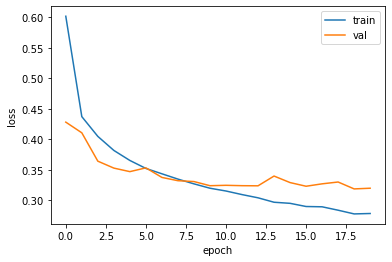

In [79]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 20번의 epoch 동안 훈련을 했기 때문에 다소 과대적합이 되어있다.
- 과대적합 되지 않은 모델을 얻기 위해 epoch수를 10으로 줄이고 다시 훈련

### 모델 저장과 복원

In [82]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(train_scaled, train_target, epochs=10, validation_data=(val_scaled, val_target))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 126us/sample - loss: 0.5927 - acc: 0.7925 - val_loss: 0.4419 - val_acc: 0.8422
Epoch 2/10
48000/48000 [==============================] - 5s 109us/sample - loss: 0.4426 - acc: 0.8410 - val_loss: 0.4261 - val_acc: 0.8444
Epoch 3/10
48000/48000 [==============================] - 6s 117us/sample - loss: 0.4046 - acc: 0.8540 - val_loss: 0.3714 - val_acc: 0.8623
Epoch 4/10
48000/48000 [==============================] - 6s 116us/sample - loss: 0.3791 - acc: 0.8611 - val_loss: 0.3621 - val_acc: 0.8698
Epoch 5/10
48000/48000 [==============================] - 6s 120us/sample - loss: 0.3663 - acc: 0.8664 - val_loss: 0.3479 - val_acc: 0.8723
Epoch 6/10
48000/48000 [==============================] - 6s 118us/sample - loss: 0.3533 - acc: 0.8694 - val_loss: 0.3597 - val_acc: 0.8721
Epoch 7/10
48000/48000 [==============================] - 6s 123us/sample - loss: 0.3412 - acc: 0.8745 - val_l

In [83]:
## keras model은 save_weights() 제공.
model.save_weights('model-weights.h5') ## <--> load_weights

In [84]:
## 모델구조와 모델파라미터를 함께 저장하는 save()
model.save('model-whole.h5')

In [85]:
!ls -al *.h5

-rw-r--r--  1 yonghyunpark  staff  332624  7 12 22:08 model-weights.h5
-rw-r--r--  1 yonghyunpark  staff  982920  7 12 22:09 model-whole.h5


- 1. 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용
- 2. 아예 model-whole.h5 파일에서 새로운 모델을 만들어 사용

In [87]:
## model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [103]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels==val_target))

0.8813333333333333


- predict() 결과에서 가장 큰 값을 고르기 위해 argmax()
- axis=-1 은 마지막 차원을 따라 최대값

- np.mean(val_labels==val_target) 은 라벨과 타깃값을 비교하여 각 위치 값이 같으면 1, 다르면 0. 이를 평균하면 정확도

In [104]:
## 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
12000/12000 [==============================] - 1s 61us/sample - loss: 0.3300 - acc: 0.8813


[0.33003276481231053, 0.88133335]

### Callback
- 최상의 검증 점수를 만드는 모델을 저장

In [105]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 7s 142us/sample - loss: 0.5868 - acc: 0.7940 - val_loss: 0.4330 - val_acc: 0.8447
Epoch 2/20
48000/48000 [==============================] - 5s 109us/sample - loss: 0.4322 - acc: 0.8421 - val_loss: 0.3874 - val_acc: 0.8579
Epoch 3/20
48000/48000 [==============================] - 6s 116us/sample - loss: 0.4007 - acc: 0.8529 - val_loss: 0.3609 - val_acc: 0.8672
Epoch 4/20
48000/48000 [==============================] - 5s 114us/sample - loss: 0.3813 - acc: 0.8609 - val_loss: 0.3421 - val_acc: 0.8754
Epoch 5/20
48000/48000 [==============================] - 6s 117us/sample - loss: 0.3619 - acc: 0.8665 - val_loss: 0.3454 - val_acc: 0.8728
Epoch 6/20
48000/48000 [==============================] - 6s 116us/sample - loss: 0.3492 - acc: 0.8709 - val_loss: 0.3415 - val_acc: 0.8751
Epoch 7/20
48000/48000 [==============================] - 6s 120us/sample - loss: 0.3391 - acc: 0.8749 - val_l

In [106]:
## 최상의 검증 점수를 낸 모델 읽어옴
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 1s 63us/sample - loss: 0.3423 - acc: 0.8828


[0.3423173414270083, 0.88283336]

**Early Stopping**
- 과대적합이 시작되기 전에 훈련을 미리 중지
- patience=2 로 지정하면 2번연속 검증 점수가 향상되지 않으면 훈련을 중지
- restore_best_weights = True 로 지정하면 가장 낮은 손실을 낸 모델 파라미터로 되돌린다.
- EarlyStopping 과 ModelCheckpoint 함께 사용하면 가장 낮은 손실의 모델을 파일에 저장하고 손실이 다시 상승할 때 훈련을 중지

In [107]:
# EarlyStopping, ModelCheckpoint 함께 사용
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['acc'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 7s 149us/sample - loss: 0.5930 - acc: 0.7937 - val_loss: 0.4341 - val_acc: 0.8414
Epoch 2/20
48000/48000 [==============================] - 5s 109us/sample - loss: 0.4401 - acc: 0.8419 - val_loss: 0.3881 - val_acc: 0.8537
Epoch 3/20
48000/48000 [==============================] - 6s 118us/sample - loss: 0.4020 - acc: 0.8557 - val_loss: 0.3688 - val_acc: 0.8644
Epoch 4/20
48000/48000 [==============================] - 6s 116us/sample - loss: 0.3829 - acc: 0.8589 - val_loss: 0.3584 - val_acc: 0.8683
Epoch 5/20
48000/48000 [==============================] - 6s 119us/sample - loss: 0.3685 - acc: 0.8663 - val_loss: 0.3488 - val_acc: 0.8723
Epoch 6/20
48000/48000 [==============================] - 6s 121us/sample - loss: 0.3550 - acc: 0.8707 - val_loss: 0.3513 - val_acc: 0.8712
Epoch 7/20
48000/48000 [==============================] - 6s 125us/sample - loss: 0.3446 - acc: 0.8737 - val_l

In [109]:
## 언제 훈련 중지되었는지
print(early_stopping_cb.stopped_epoch) ## 0부터 시작하므로, 15는 16번째임.
## patience=2 로 지정했으므로 최상의 모델은 14번째 epoch

15


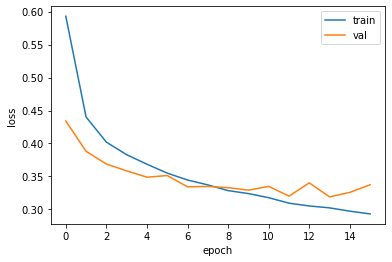

In [113]:
## 훈련손실과 검증손실 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [114]:
## 조기종료로 얻은 모델을 사용해 검증 세트에 대한 성능 확인
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 1s 43us/sample - loss: 0.3189 - acc: 0.8856


[0.3189010344147682, 0.88558334]

# 정리

- 과대적합을 막기 위한 dropout : 일부 뉴런의 출력을 랜덤하게 꺼서 많은 신경망을 앙상블하는 효과
- 모델의 파라미터를 저장하고 다시 불러오는 메소드
- ModelCheckpoint, EarlyStopping : 최상의 모델을 저장하고 epochs를 자동으로 멈춰준다.